In [370]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors
from sklearn.model_selection import train_test_split
from tqdm.auto import tqdm
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import pandas as pd
from sklearn.metrics import *

In [377]:
dataset = pd.read_csv("dataset/dataset.csv")
y = dataset['36']
X = dataset.drop(columns=['36'])
def remap_labels(labels):
    remap_dict = {1: 0, 2: 1, 3: 2, 4: 3, 5: 4, 7: 5}
    return [remap_dict[label] for label in labels]

remapped_labels = remap_labels(y.values)

In [378]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X.values)

In [379]:
encoder = OneHotEncoder(sparse=False)
y_encoded = encoder.fit_transform(np.array(remapped_labels).reshape(-1, 1))

C:\Users\pars iran\AppData\Roaming\Python\Python311\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [523]:
import numpy as np
import matplotlib.pyplot as plt

class SLFN:
    def __init__(self, input_size, output_size):
        np.random.seed(86)
        
        self.weights = np.random.rand(input_size, output_size) * 0.01
        self.biases = np.zeros((1, output_size))
        
    def softmax(self, x):
        exp_x = np.exp(x - np.max(x, axis=1, keepdims=True))
        return exp_x / np.sum(exp_x, axis=1, keepdims=True)
    
    def cross_entropy_loss(self, y_true, y_pred):
        return -np.mean(np.sum(y_true * np.log(y_pred + 1e-12), axis=1))
    
    def forward(self, x):
        z = np.dot(x, self.weights) + self.biases
        return self.softmax(z)
    
    def predict(self, X):
        y_pred = self.forward(X)
        return np.argmax(y_pred, axis=1)
    
    def accuracy(self, y_true, y_pred):
        return np.mean(np.argmax(y_true, axis=1) == y_pred)
    
    def train(self, X, y, epochs, lr):
        losses = []
        accuracies = []
        

        for epoch in tqdm(range(epochs), desc="Training Progress"):
            indices = np.arange(X.shape[0])
            np.random.shuffle(indices)
            X_shuffled = X[indices]
            y_shuffled = y[indices]

            for i in range(X_shuffled.shape[0]):
                X_sample = X_shuffled[i:i+1]
                y_sample = y_shuffled[i:i+1]

                # Forward pass
                y_pred = self.forward(X_sample)

                # Backward pass
                d_loss_y_pred = y_pred - y_sample
                d_loss_weights = np.dot(X_sample.T, d_loss_y_pred) / X_sample.shape[0]
                d_loss_biases = np.mean(d_loss_y_pred, axis=0, keepdims=True)

                # Update weights and biases
                self.weights -= lr * d_loss_weights
                self.biases -= lr * d_loss_biases

            
            pred_labels = self.predict(X)
            pred_labels_encoded = self.forward(X)
            loss = self.cross_entropy_loss(y, pred_labels_encoded)
            losses.append(loss)
            
            acc = self.accuracy(y, pred_labels)
            accuracies.append(acc)

        plt.figure(figsize=(12, 5))
        plt.subplot(1, 2, 1)
        plt.plot(losses, label='Loss')
        plt.title('Loss during training')
        plt.xlabel('Iteration')
        plt.ylabel('Loss')
        plt.legend()

        plt.subplot(1, 2, 2)
        plt.plot(accuracies, label='Accuracy', color='orange')
        plt.title('Accuracy during training')
        plt.xlabel('Epoch')
        plt.ylabel('Accuracy')
        plt.legend()
        plt.show()

In [524]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.2, random_state=42)

Training Progress:   0%|          | 0/5 [00:00<?, ?it/s]

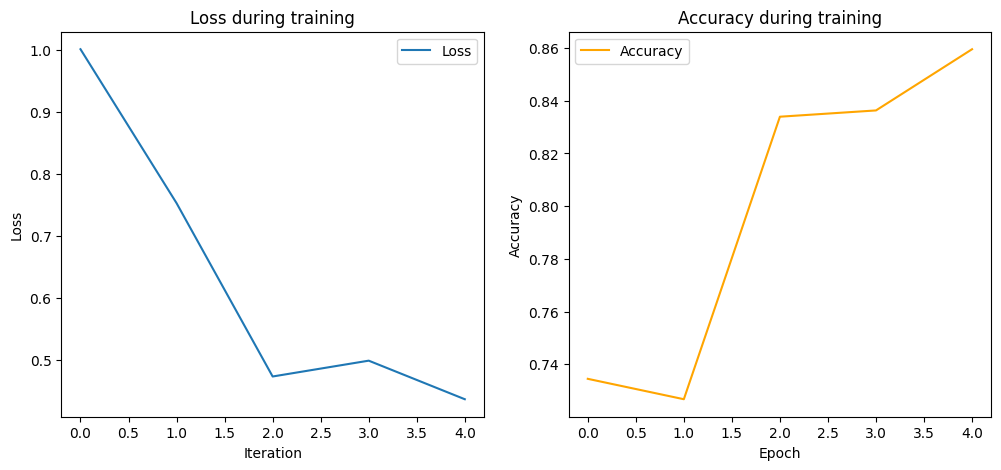

In [525]:

slfn = SLFN(input_size, output_size)
slfn.train(X_train, y_train, epochs=5, lr=0.1)

In [526]:
y_pred = slfn.predict(X_train)
report = classification_report(np.argmax(y_train,axis=1), y_pred)
print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.96      0.96       278
           1       0.94      0.97      0.95       270
           2       0.80      0.94      0.86       290
           3       0.74      0.75      0.75       279
           4       0.87      0.79      0.83       279
           5       0.86      0.75      0.80       284

    accuracy                           0.86      1680
   macro avg       0.86      0.86      0.86      1680
weighted avg       0.86      0.86      0.86      1680



In [527]:
y_pred = slfn.predict(X_test)
report = classification_report(np.argmax(y_test,axis=1), y_pred)
print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99        72
           1       0.87      0.93      0.90        80
           2       0.79      0.98      0.87        60
           3       0.79      0.73      0.76        71
           4       0.85      0.85      0.85        71
           5       0.94      0.73      0.82        66

    accuracy                           0.87       420
   macro avg       0.87      0.87      0.86       420
weighted avg       0.87      0.87      0.86       420



In [458]:
testset = pd.read_csv("dataset/tests.csv")

In [459]:
scaler = StandardScaler()
test_scaled = scaler.fit_transform(testset.values)

In [460]:
test_pred = slfn.predict(test_scaled)